In [ ]:
from google.colab import drive

drive.mount('drive')

In [1]:
import pandas as pd
from keras.utils import get_file

path = 'kdd_10_percent.csv'
print(path) 

df = pd.read_csv(path, header=None)

print("Read {} rows.".format(len(df)))
df.dropna(inplace=True,axis=1) # Not going ahead with imputation as of now

# The CSV file has no column heads, so add them
df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

# display 5 rows
df[0:5]

Using TensorFlow backend.


kdd_10_percent.csv
Read 494021 rows.


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
type(df['duration'][0])

numpy.int64

In [2]:
ENCODING = 'utf-8'

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

In [3]:
# Analyze KDD-99

import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore

analyze(df)


494021 rows
** duration:2495 (0%)
** protocol_type:[icmp:57.41%,tcp:38.47%,udp:4.12%]
** service:[ecr_i:56.96%,private:22.45%,http:13.01%,smtp:1.97%,other:1.46%,domain_u:1.19%,ftp_data:0.96%,eco_i:0.33%,ftp:0.16%,finger:0.14%,urp_i:0.11%,telnet:0.1%,ntp_u:0.08%,auth:0.07%,pop_3:0.04%,time:0.03%,csnet_ns:0.03%,remote_job:0.02%,gopher:0.02%,imap4:0.02%,domain:0.02%,discard:0.02%,systat:0.02%,iso_tsap:0.02%,echo:0.02%,shell:0.02%,rje:0.02%,whois:0.02%,sql_net:0.02%,printer:0.02%,nntp:0.02%,courier:0.02%,mtp:0.02%,sunrpc:0.02%,netbios_ssn:0.02%,vmnet:0.02%,uucp:0.02%,uucp_path:0.02%,bgp:0.02%,klogin:0.02%,ssh:0.02%,nnsp:0.02%,supdup:0.02%,login:0.02%,hostnames:0.02%,efs:0.02%,daytime:0.02%,link:0.02%,netbios_ns:0.02%,pop_2:0.02%,ldap:0.02%,http_443:0.02%,exec:0.02%,netbios_dgm:0.02%,kshell:0.02%,name:0.02%,ctf:0.02%,netstat:0.02%,Z39_50:0.02%,IRC:0.01%,urh_i:0.0%,X11:0.0%,tim_i:0.0%,red_i:0.0%,pm_dump:0.0%,tftp_u:0.0%]
** flag:[SF:76.6%,S0:17.61%,REJ:5.44%,RSTR:0.18%,RSTO:0.12%,SH:0.02%,S

** dst_host_serror_rate:[0.0:80.93%,1.0:17.56%,0.01:0.74%,0.02:0.2%,0.03:0.09%,0.09:0.05%,0.04:0.04%,0.05:0.04%,0.07:0.03%,0.08:0.03%,0.06:0.02%,0.14:0.02%,0.15:0.02%,0.11:0.02%,0.13:0.02%,0.16:0.02%,0.1:0.02%,0.12:0.01%,0.18:0.01%,0.25:0.01%,0.2:0.01%,0.17:0.01%,0.33:0.01%,0.99:0.01%,0.19:0.01%,0.31:0.01%,0.27:0.01%,0.5:0.0%,0.22:0.0%,0.98:0.0%,0.35:0.0%,0.28:0.0%,0.53:0.0%,0.24:0.0%,0.96:0.0%,0.3:0.0%,0.26:0.0%,0.97:0.0%,0.29:0.0%,0.94:0.0%,0.42:0.0%,0.32:0.0%,0.56:0.0%,0.55:0.0%,0.95:0.0%,0.6:0.0%,0.23:0.0%,0.93:0.0%,0.34:0.0%,0.85:0.0%,0.89:0.0%,0.21:0.0%,0.92:0.0%,0.58:0.0%,0.43:0.0%,0.9:0.0%,0.57:0.0%,0.91:0.0%,0.49:0.0%,0.82:0.0%,0.36:0.0%,0.87:0.0%,0.45:0.0%,0.62:0.0%,0.65:0.0%,0.46:0.0%,0.38:0.0%,0.61:0.0%,0.47:0.0%,0.76:0.0%,0.81:0.0%,0.54:0.0%,0.64:0.0%,0.44:0.0%,0.48:0.0%,0.72:0.0%,0.39:0.0%,0.52:0.0%,0.51:0.0%,0.67:0.0%,0.84:0.0%,0.73:0.0%,0.4:0.0%,0.69:0.0%,0.79:0.0%,0.41:0.0%,0.68:0.0%,0.88:0.0%,0.77:0.0%,0.75:0.0%,0.7:0.0%,0.8:0.0%,0.59:0.0%,0.71:0.0%,0.37:0.0%,0.86:0.0

In [3]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    print("Encoding {name} of dtype {datatype}".format(name=name, datatype=type(df[name][0])))  
  
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd
    
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [4]:
# Now encode the feature vector

encode_numeric_zscore(df, 'duration')
encode_text_dummy(df, 'protocol_type')
encode_text_dummy(df, 'service')
encode_text_dummy(df, 'flag')
encode_numeric_zscore(df, 'src_bytes')
encode_numeric_zscore(df, 'dst_bytes')
encode_text_dummy(df, 'land')
encode_numeric_zscore(df, 'wrong_fragment')
encode_numeric_zscore(df, 'urgent')
encode_numeric_zscore(df, 'hot')
encode_numeric_zscore(df, 'num_failed_logins')
encode_text_dummy(df, 'logged_in')
encode_numeric_zscore(df, 'num_compromised')
encode_numeric_zscore(df, 'root_shell')
encode_numeric_zscore(df, 'su_attempted')
encode_numeric_zscore(df, 'num_root')
encode_numeric_zscore(df, 'num_file_creations')
encode_numeric_zscore(df, 'num_shells')
encode_numeric_zscore(df, 'num_access_files')
encode_numeric_zscore(df, 'num_outbound_cmds')
encode_text_dummy(df, 'is_host_login')
encode_text_dummy(df, 'is_guest_login')
encode_numeric_zscore(df, 'count')
encode_numeric_zscore(df, 'srv_count')
encode_numeric_zscore(df, 'serror_rate')
encode_numeric_zscore(df, 'srv_serror_rate')
encode_numeric_zscore(df, 'rerror_rate')
encode_numeric_zscore(df, 'srv_rerror_rate')
encode_numeric_zscore(df, 'same_srv_rate')
encode_numeric_zscore(df, 'diff_srv_rate')
encode_numeric_zscore(df, 'srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_count')
encode_numeric_zscore(df, 'dst_host_srv_count')
encode_numeric_zscore(df, 'dst_host_same_srv_rate')
encode_numeric_zscore(df, 'dst_host_diff_srv_rate')
encode_numeric_zscore(df, 'dst_host_same_src_port_rate')
encode_numeric_zscore(df, 'dst_host_srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_serror_rate')
encode_numeric_zscore(df, 'dst_host_srv_serror_rate')
encode_numeric_zscore(df, 'dst_host_rerror_rate')
encode_numeric_zscore(df, 'dst_host_srv_rerror_rate')

# display 5 rows

df.dropna(inplace=True,axis=1)
df[0:5]
# This is the numeric feature vector, as it goes to the neural net


# Convert to numpy - Classification
x_columns = df.columns.drop('outcome')
x = df[x_columns].values
dummies = pd.get_dummies(df['outcome']) # Classification
outcomes = dummies.columns
num_classes = len(outcomes)
y = dummies.values

Encoding duration of dtype <class 'numpy.int64'>
Encoding src_bytes of dtype <class 'numpy.int64'>
Encoding dst_bytes of dtype <class 'numpy.int64'>
Encoding wrong_fragment of dtype <class 'numpy.int64'>
Encoding urgent of dtype <class 'numpy.int64'>
Encoding hot of dtype <class 'numpy.int64'>
Encoding num_failed_logins of dtype <class 'numpy.int64'>
Encoding num_compromised of dtype <class 'numpy.int64'>
Encoding root_shell of dtype <class 'numpy.int64'>
Encoding su_attempted of dtype <class 'numpy.int64'>
Encoding num_root of dtype <class 'numpy.int64'>
Encoding num_file_creations of dtype <class 'numpy.int64'>
Encoding num_shells of dtype <class 'numpy.int64'>
Encoding num_access_files of dtype <class 'numpy.int64'>
Encoding num_outbound_cmds of dtype <class 'numpy.int64'>
Encoding count of dtype <class 'numpy.int64'>
Encoding srv_count of dtype <class 'numpy.int64'>
Encoding serror_rate of dtype <class 'numpy.float64'>
Encoding srv_serror_rate of dtype <class 'numpy.float64'>
Encod

In [6]:
print(df.head(5))

   duration  src_bytes  dst_bytes  wrong_fragment    urgent       hot  \
0 -0.067792  -0.002879   0.138664        -0.04772 -0.002571 -0.044136   
1 -0.067792  -0.002820  -0.011578        -0.04772 -0.002571 -0.044136   
2 -0.067792  -0.002824   0.014179        -0.04772 -0.002571 -0.044136   
3 -0.067792  -0.002840   0.014179        -0.04772 -0.002571 -0.044136   
4 -0.067792  -0.002842   0.035214        -0.04772 -0.002571 -0.044136   

   num_failed_logins  num_compromised  root_shell  su_attempted  ...  flag-S3  \
0          -0.009782        -0.005679   -0.010552     -0.004676  ...        0   
1          -0.009782        -0.005679   -0.010552     -0.004676  ...        0   
2          -0.009782        -0.005679   -0.010552     -0.004676  ...        0   
3          -0.009782        -0.005679   -0.010552     -0.004676  ...        0   
4          -0.009782        -0.005679   -0.010552     -0.004676  ...        0   

   flag-SF  flag-SH  land-0  land-1  logged_in-0  logged_in-1  \
0        

In [7]:
df['outcome'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [5]:
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Create a test/train split.  25% test
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

# Create neural net
model = Sequential()
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(50, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal'))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
filepath="drive/My Drive/ids-training/model_{epoch:02d}-{loss:.4f}.model"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, monitor]
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=callbacks_list,verbose=2,epochs=1000)

AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [ ]:
print(x_test[0].shape)

(120,)


In [ ]:
import keras



model = Sequential()
model.add(Dense(10, input_dim=120, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, input_dim=120, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, input_dim=120, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(y.shape[1],activation='softmax'))

model = keras.models.load_model("drive/My Drive/ids-training/model_28-0.0258.model")

# Measure accuracy
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

Validation score: 0.9940974527553317


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                1210      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
_________________________________________________________________
dense_5 (Dense)              (None, 23)                46        
Total params: 2,327
Trainable params: 2,327
Non-trainable params: 0
_________________________________________________________________


In [ ]:
validation_score = 0.9955710653733422

23

# Quantum Stuff

## Setup

In [1]:
# from keras.layers import Input, Dense
# from keras.models import Model
# from keras import backend
import tensorflow as tf
import keras
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics

from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.eager.context import context, EAGER_MODE, GRAPH_MODE


# from keras.models import Sequential
# from keras.layers import Dense, Activation
# from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [2]:
import tensorflow
print(tensorflow.__version__)

2.2.0


In [3]:
import pandas as pd
from keras.utils import get_file

path = 'kdd_10_percent.csv'
print(path) 

df = pd.read_csv(path, header=None)

print("Read {} rows.".format(len(df)))
df.dropna(inplace=True,axis=1) # Not going ahead with imputation as of now

# The CSV file has no column heads, so add them
df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

# display 5 rows
df[0:5]

kdd_10_percent.csv
Read 494021 rows.


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    print("Encoding {name} of dtype {datatype}".format(name=name, datatype=type(df[name][0])))  
  
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd
    
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [5]:
# Now encode the feature vector

encode_numeric_zscore(df, 'duration')
encode_text_dummy(df, 'protocol_type')
encode_text_dummy(df, 'service')
encode_text_dummy(df, 'flag')
encode_numeric_zscore(df, 'src_bytes')
encode_numeric_zscore(df, 'dst_bytes')
encode_text_dummy(df, 'land')
encode_numeric_zscore(df, 'wrong_fragment')
encode_numeric_zscore(df, 'urgent')
encode_numeric_zscore(df, 'hot')
encode_numeric_zscore(df, 'num_failed_logins')
encode_text_dummy(df, 'logged_in')
encode_numeric_zscore(df, 'num_compromised')
encode_numeric_zscore(df, 'root_shell')
encode_numeric_zscore(df, 'su_attempted')
encode_numeric_zscore(df, 'num_root')
encode_numeric_zscore(df, 'num_file_creations')
encode_numeric_zscore(df, 'num_shells')
encode_numeric_zscore(df, 'num_access_files')
encode_numeric_zscore(df, 'num_outbound_cmds')
encode_text_dummy(df, 'is_host_login')
encode_text_dummy(df, 'is_guest_login')
encode_numeric_zscore(df, 'count')
encode_numeric_zscore(df, 'srv_count')
encode_numeric_zscore(df, 'serror_rate')
encode_numeric_zscore(df, 'srv_serror_rate')
encode_numeric_zscore(df, 'rerror_rate')
encode_numeric_zscore(df, 'srv_rerror_rate')
encode_numeric_zscore(df, 'same_srv_rate')
encode_numeric_zscore(df, 'diff_srv_rate')
encode_numeric_zscore(df, 'srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_count')
encode_numeric_zscore(df, 'dst_host_srv_count')
encode_numeric_zscore(df, 'dst_host_same_srv_rate')
encode_numeric_zscore(df, 'dst_host_diff_srv_rate')
encode_numeric_zscore(df, 'dst_host_same_src_port_rate')
encode_numeric_zscore(df, 'dst_host_srv_diff_host_rate')
encode_numeric_zscore(df, 'dst_host_serror_rate')
encode_numeric_zscore(df, 'dst_host_srv_serror_rate')
encode_numeric_zscore(df, 'dst_host_rerror_rate')
encode_numeric_zscore(df, 'dst_host_srv_rerror_rate')

# display 5 rows

df.dropna(inplace=True,axis=1)
df[0:5]
# This is the numeric feature vector, as it goes to the neural net


# Convert to numpy - Classification
x_columns = df.columns.drop('outcome')
x = df[x_columns].values
dummies = pd.get_dummies(df['outcome']) # Classification
outcomes = dummies.columns
num_classes = len(outcomes)
y = dummies.values

Encoding duration of dtype <class 'numpy.int64'>
Encoding src_bytes of dtype <class 'numpy.int64'>
Encoding dst_bytes of dtype <class 'numpy.int64'>
Encoding wrong_fragment of dtype <class 'numpy.int64'>
Encoding urgent of dtype <class 'numpy.int64'>
Encoding hot of dtype <class 'numpy.int64'>
Encoding num_failed_logins of dtype <class 'numpy.int64'>
Encoding num_compromised of dtype <class 'numpy.int64'>
Encoding root_shell of dtype <class 'numpy.int64'>
Encoding su_attempted of dtype <class 'numpy.int64'>
Encoding num_root of dtype <class 'numpy.int64'>
Encoding num_file_creations of dtype <class 'numpy.int64'>
Encoding num_shells of dtype <class 'numpy.int64'>
Encoding num_access_files of dtype <class 'numpy.int64'>
Encoding num_outbound_cmds of dtype <class 'numpy.int64'>
Encoding count of dtype <class 'numpy.int64'>
Encoding srv_count of dtype <class 'numpy.int64'>
Encoding serror_rate of dtype <class 'numpy.float64'>
Encoding srv_serror_rate of dtype <class 'numpy.float64'>
Encod

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

## Trying a custom hidden layer

In [7]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
import qiskit

In [128]:
def quantum_layer(parameters):
    # expecting parameters to be a numpy array
    quantumRegister = QuantumRegister(10)
    classicalRegister = ClassicalRegister(10)
    quantumCircuit = QuantumCircuit(quantumRegister, classicalRegister)
    
    quantumCircuit.h(range(10))
    quantumCircuit.barrier(range(10))
    for i in range(10):
        quantumCircuit.ry(parameters[i], i)
        for j in range(i+1, 10, 1):
            quantumCircuit.cx(i, j)
        quantumCircuit.barrier(range(10))
    quantumCircuit.measure(range(10), range(10))
    return quantumCircuit
#     # executing
#     backend = qiskit.Aer.get_backend("qasm_simulator")
#     counts = qiskit.execute(quantumCircuit, backend, shots=1).result().get_counts()
#     del(quantumCircuit)
#     return [i for i in counts.keys()][0][::-1]

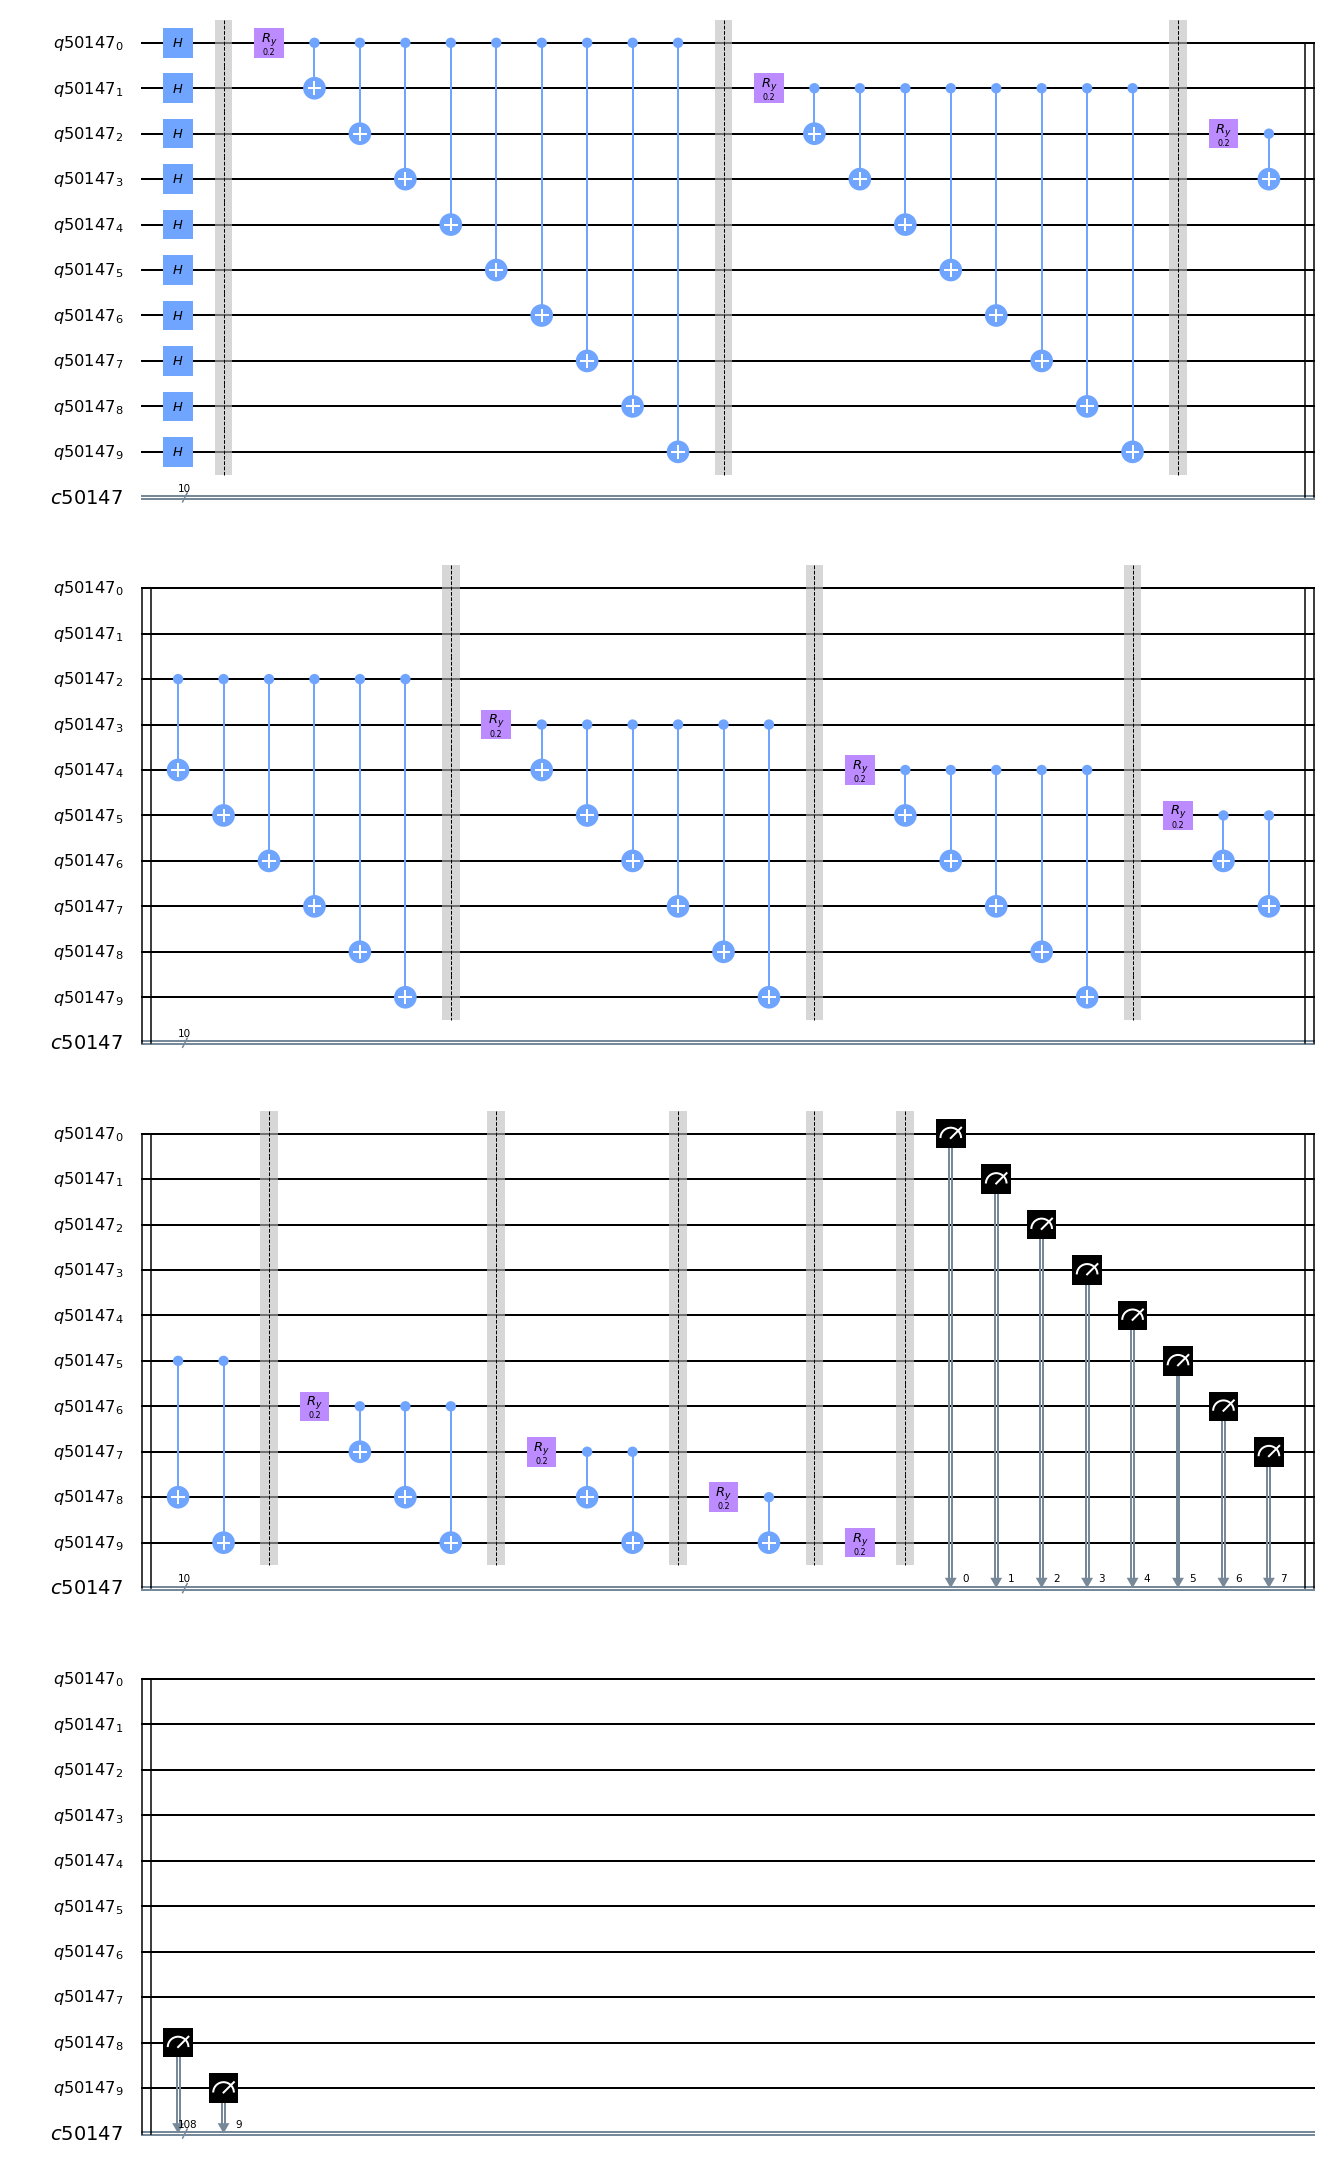

In [129]:
qc = quantum_layer(np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]))
qc.draw(output="mpl")

In [119]:
class Linear(Layer):
    def __init__(self, units=1, input_dim=10):
        super(Linear, self).__init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value=w_init(shape=(input_dim, units), dtype="float32"),
            trainable=True,
        )
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(
            initial_value=b_init(shape=(units,), dtype="float32"), trainable=True
        )
        
    def call(self, inputs):
        intermediate_output = tf.matmul(inputs, self.w) + self.b

        if(tf.executing_eagerly()):
            final_output = []
            intermediate_output_numpy = intermediate_output.numpy()
            for i in range(intermediate_output_numpy.shape[0]):
                pred = quantum_layer(intermediate_output_numpy)
                pred_list = [i for i in pred]
                final_output.append(pred_list)
            return tf.convert_to_tensor(final_output)
        return intermediate_output

In [ ]:
test_1 = tf.ones((1, 10))
linear_layer = Linear(10)
test_2 = linear_layer(test_1)

tracking <tf.Variable 'Variable_45:0' shape=(10, 10) dtype=float32> w
tracking <tf.Variable 'Variable_46:0' shape=(10,) dtype=float32> b
(1, 10)


In [120]:
inputs = Input(shape=(120,))
layer_1 = Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='relu', name="layer_1")(inputs)
layer_2 = Dense(50, input_dim=x.shape[1], kernel_initializer='normal', activation='relu', name="layer_2")(layer_1)
layer_3 = Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='relu', name="layer_3")(layer_2)
layer_4 = Linear(10)(layer_3) # <----------- the custom layer
# layer_4 = Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='relu', name="layer_4")(layer_3)
output = Dense(y.shape[1],activation='softmax')(layer_4)



model = Model(inputs=inputs, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', run_eagerly=True)
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
callbacks_list = [monitor]
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=callbacks_list,verbose=2,epochs=2) # EPOCHS are less for testing purpose
print(model.summary())

Epoch 1/2


KeyboardInterrupt: 

In [21]:
from tensorflow.keras.optimizers import Adam
from keras import backend as K
from tensorflow.keras.losses import categorical_crossentropy

EPOCHS = 25
BS = 64
INIT_LR = 1e-3

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
def step(X, y):
	# keep track of our gradients
  with tf.GradientTape() as tape:
		# make a prediction using the model and then calculate the
		# loss
    X = tf.convert_to_tensor(X, dtype=tf.float32)
    pred = model(X)
    loss = categorical_crossentropy(y, pred)
	# calculate the gradients using our tape and then update the
	# model weights
  grads = tape.gradient(loss, model.trainable_variables)
  opt.apply_gradients(zip(grads, model.trainable_variables))

In [ ]:

import time

# numUpdates = int(x_train.shape[0] / BS)
# for epoch in range(0, EPOCHS):
#   print("[INFO] starting epoch {}/{}...".format(epoch + 1, EPOCHS), end="\n")
#   epochStart = time.time()
#   for i in range(0, numUpdates):
#     X = x_train[i]
#     y = y_train[i]
#     print(X.shape)
#     print(y.shape)
#     step(X, y)

# compute the number of batch updates per epoch
numUpdates = int(x_train.shape[0] / BS)
# loop over the number of epochs
for epoch in range(0, EPOCHS):
	# show the current epoch number
	print("[INFO] starting epoch {}/{}...".format(
		epoch + 1, EPOCHS), end="")
	epochStart = time.time()
	# loop over the data in batch size increments
	for i in range(0, numUpdates):
		# determine starting and ending slice indexes for the current
		# batch
		start = i * BS
		end = start + BS
		# take a step
		step(x_train[start:end], y_train[start:end])
	# show timing information for the epoch
	epochEnd = time.time()
	elapsed = (epochEnd - epochStart) / 60.0
	print("took {:.4} minutes".format(elapsed))

Streaming output truncated to the last 5000 lines.
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Intermediate output: 
Int

In [ ]:
print(x_train.shape)
print(y_train.shape)

(370515, 120)
(370515, 23)


In [ ]:
from keras import backend as K
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[4].output])


In [ ]:
layer_output = get_3rd_layer_output([x])[0]

In [ ]:
print(layer_output)

[[  1.7439989   3.1271105   2.1120236 ...   6.183931  -10.688384
   -2.9612799]
 [  1.7611593   3.1793783   2.187231  ...   6.4832277 -11.0663
   -3.0851018]
 [  1.7701832   3.194792    2.2159338 ...   6.6179786 -11.238951
   -3.141152 ]
 ...
 [  1.3687937   3.8882432   2.8335438 ...   8.620382  -12.572034
   -3.480296 ]
 [  1.3687532   3.8097472   2.849422  ...   9.191271  -13.207312
   -3.6616929]
 [  1.3135804   3.707415    2.7331965 ...   8.903459  -12.750707
   -3.4968083]]


In [ ]:
print(keras.__version__)

2.3.1
